This notebook is intended to set the intial peak parameters.

## Imports

In [1]:
import pathlib

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum
import yaml

import analysis_functions as analysis

%load_ext autoreload
%autoreload 2

# Find data files
Rather than type in the full name of each file, it is easier to glob the files and then go through the list.

In [2]:
#data_folder = pathlib.Path("../example_data/caked")
data_folder = pathlib.Path("../../../SXRD_raw_data/diamond_2017/data_caked/10deg_caked_data_for_SPF/adc_065_TI64_NDload_900C_15mms_ascii/")
files = sorted(list(data_folder.glob("*.dat")))

## Initial fit

Specify the name of the file to be analysed and give the angle of the first cake:

In [3]:
file_path = files[0]
print(file_path)
first_cake_angle = 90

../../../SXRD_raw_data/diamond_2017/data_caked/10deg_caked_data_for_SPF/adc_065_TI64_NDload_900C_15mms_ascii/adc_065_TI64_NDload_900C_15mms_00001.dat


Load the data:

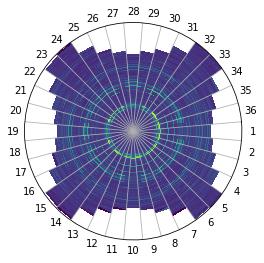

In [4]:
spectral_data = FitSpectrum(file_path, first_cake_angle)
spectral_data.plot_polar()

Choose the cakes to fit:

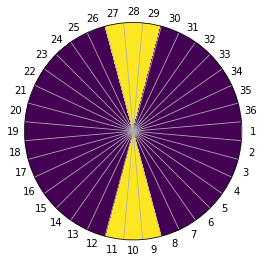

In [5]:
cakes_to_fit = [27, 28, 29, 9, 10, 11] # top and bottom slices for 36 cakes
# cakes_to_fit = [18, 19, 20, 54, 55, 56] # top and bottom slices for 72 cakes
spectral_data.highlight_cakes(cakes_to_fit)

Plot the spectra:

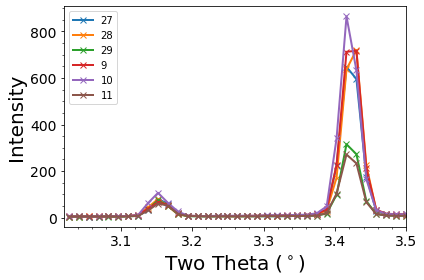

In [10]:
spectral_data.plot(cakes_to_fit, x_range=(3.02, 3.5), show_points=True)

Set the peak parameters:

In [108]:
peak_params = [
               PeakParams((3.02, 3.27), '(10-10)'),
               PeakParams((3.22, 4.0), ['(0002)', '(110)', '(10-11)'], [(3.4, 3.44), (3.52, 3.55), (3.57, 3.6)]),
               PeakParams((4.54, 4.8), '(10-12)'),
               PeakParams((4.9, 5.10), '(200)'),
               PeakParams((5.35, 5.6), '(11-20)'),
               PeakParams((5.9, 6.25), '(10-13)'),
#                PeakParams((5.9, 6.25), ['(10-13)', '(211)'], [(6.00, 6.05), (6.11, 6.15)]),
               PeakParams((6.19, 6.71), ['(20-20)', '(11-22)', '(20-21)'], [(6.3, 6.34), (6.43, 6.47), (6.52, 6.56)]),
#                PeakParams((6.7, 6.95), '(0004)', [(6.82, 6.87)]),
#                PeakParams((6.95, 7.35), ['(220)', '(20-22)'], [(7.05, 7.12), (7.16, 7.20)])
               PeakParams((6.7, 7.35), ['(0004)', '(220)', '(20-22)'], [(6.82, 6.87), (7.05, 7.12), (7.16, 7.20)])
               ]

In [109]:
peak_params

[<PeakParams((3.02, 3.27), maxima: ['(10-10)'])>, maxima bounds: [(3.02, 3.27)]),
 <PeakParams((3.22, 4.0), maxima: ['(0002)', '(110)', '(10-11)'])>, maxima bounds: [(3.4, 3.44), (3.52, 3.55), (3.57, 3.6)]),
 <PeakParams((4.54, 4.8), maxima: ['(10-12)'])>, maxima bounds: [(4.54, 4.8)]),
 <PeakParams((4.9, 5.1), maxima: ['(200)'])>, maxima bounds: [(4.9, 5.1)]),
 <PeakParams((5.35, 5.6), maxima: ['(11-20)'])>, maxima bounds: [(5.35, 5.6)]),
 <PeakParams((5.9, 6.25), maxima: ['(10-13)'])>, maxima bounds: [(5.9, 6.25)]),
 <PeakParams((6.19, 6.71), maxima: ['(20-20)', '(11-22)', '(20-21)'])>, maxima bounds: [(6.3, 6.34), (6.43, 6.47), (6.52, 6.56)]),
 <PeakParams((6.7, 7.35), maxima: ['(0004)', '(220)', '(20-22)'])>, maxima bounds: [(6.82, 6.87), (7.05, 7.12), (7.16, 7.2)])]

In [ ]:
class ComplexNumber:
    def __init__(self, r=0, i=0):
        self.real = r
        self.imag = i

    def get_data(self):
        print(f'{self.real}+{self.imag}j')

In [ ]:
class PeakObject:
    def __init__(self, full_bound_min, full_bound_max, peak_label,
                *min_bounds_1, *max_bounds_1,
                *min_bounds_2, *max_bounds_2,
                *min_bounds_3, *max_bounds_3,
                *min_bounds_4, *max_bounds_4,
                *min_bounds_5, *max_bounds_5):
        
        self.full_bound_min = full_bound_min
        self.full_bound_max = full_bound_max
        self.peak_label = peak_label
        
            if len(peak_label = 2)
                self.min_bounds_1 = min_bounds_1
                self.max_bounds_1 = max_bounds_1
                self.min_bounds_2 = min_bounds_2
                self.max_bounds_2 = max_bounds_2
            if len(peak_label = 3)
                self.min_bounds_3 = min_bounds_3
                self.max_bounds_3 = max_bounds_3
            
    def get_peak_parameters(self):
        if len(peak_label = 1)
            PeakParams((self.full_bound_min, self.full_bound_max), self.peak_label)
        

In [46]:
peak_label = (3.4, 3.44)
type(peak_label)

tuple

In [63]:
peak_bounds = '3.22, 4.0'
peak_label = ['(0002)', '(110)', '(10-11)']
local_bounds = ['3.40, 3.44', '3.52, 3.55', '3.57, 3.60']

In [64]:
print(local_bounds)
print(local_bounds[0][0])
print(peak_label[0])

['3.40, 3.44', '3.52, 3.55', '3.57, 3.60']
3
(0002)


In [68]:
peak_bounds_tuple = tuple(map(float, peak_bounds.split(', ')))

local_bounds_tuple = []
for bound in local_bounds:
    bound_tuple = tuple(map(float, bound.split(', ')))
    local_bounds_tuple.append(bound_tuple)
    
local_bounds_tuple[0]

tuple

In [35]:
local_bounds_tuple = tuple(map(float, local_bounds[0].split(', ')))

ValueError: could not convert string to float: '(3.4'

In [31]:
print(local_bounds_tuple)

[]


Save peak parameters as a dictionary, then create function to load those peak parameters as into the PeakParams class.

In [40]:
peak_bounds = (3.02, 3.27)
peak_label = ['(10-10)']

peak_bounds= (3.22, 4.0)
peak_label = ['(0002)', '(110)', '(10-11)']
local_bounds = [(3.4, 3.44), (3.52, 3.55), (3.57, 3.6)]



peak_params = [
               PeakParams((bound_min1, bound_max1), peak1),
               PeakParams((bound_min2, bound_max2), peak2, [(3.4, 3.44), (3.52, 3.55), (3.57, 3.6)]),
               PeakParams((4.54, 4.8), '(10-12)'),
               PeakParams((4.9, 5.10), '(200)'),
               PeakParams((5.35, 5.6), '(11-20)'),
               PeakParams((5.9, 6.25), '(10-13)'),
#                PeakParams((5.9, 6.25), ['(10-13)', '(211)'], [(6.00, 6.05), (6.11, 6.15)]),
               PeakParams((6.19, 6.71), ['(20-20)', '(11-22)', '(20-21)'], [(6.3, 6.34), (6.43, 6.47), (6.52, 6.56)]),
#                PeakParams((6.7, 6.95), '(0004)', [(6.82, 6.87)]),
#                PeakParams((6.95, 7.35), ['(220)', '(20-22)'], [(7.05, 7.12), (7.16, 7.20)])
               PeakParams((6.7, 7.35), ['(0004)', '(220)', '(20-22)'], [(6.82, 6.87), (7.05, 7.12), (7.16, 7.20)])
               ]

peak_params

SyntaxError: invalid syntax (1860229368.py, line 8)

In [39]:
PeakParams?

Check the peak parameters are good

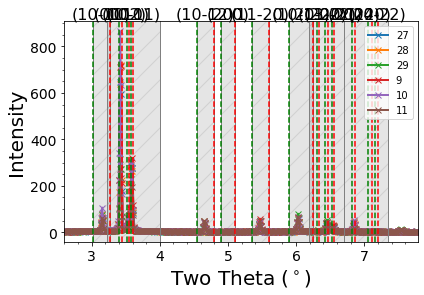

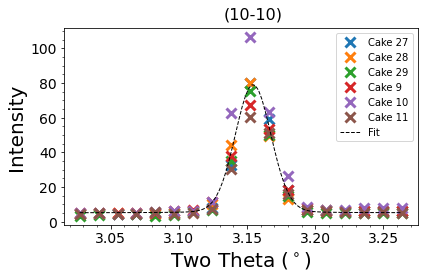

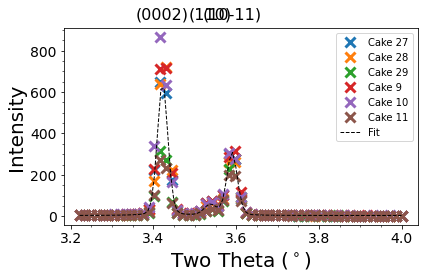

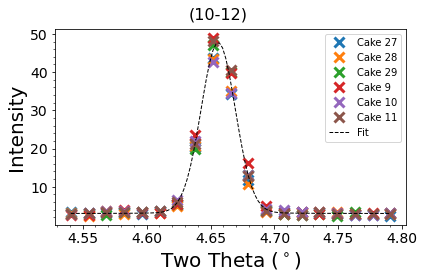

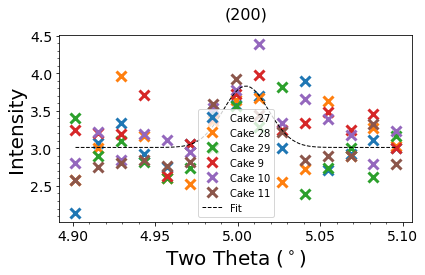

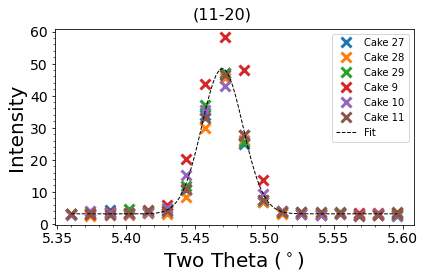

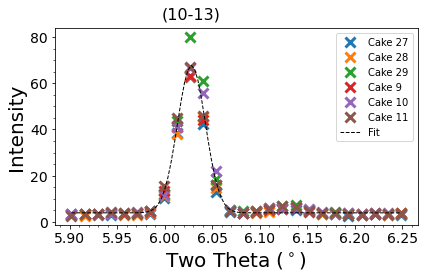

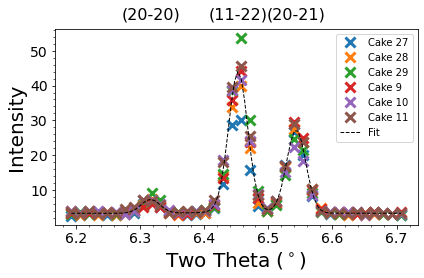

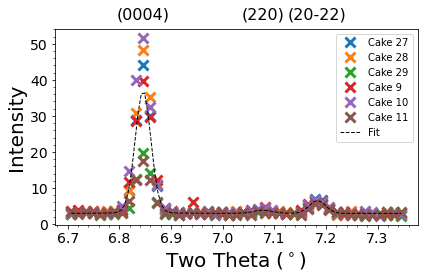

In [17]:
spectral_data.plot_peak_params(peak_params, cakes_to_fit, show_points=True)
spectral_data.fit_peaks(peak_params, cakes_to_fit, merge_cakes=False)

spectral_data.plot_fit('(10-10)')
spectral_data.plot_fit('(0002) (110) (10-11)')
spectral_data.plot_fit('(10-12)')
spectral_data.plot_fit('(200)')
spectral_data.plot_fit('(11-20)')
# spectral_data.plot_fit('(10-13) (211)')
spectral_data.plot_fit('(10-13)')
spectral_data.plot_fit('(20-20) (11-22) (20-21)')
# spectral_data.plot_fit('(0004)')
# spectral_data.plot_fit('(220) (20-22)')
spectral_data.plot_fit('(0004) (220) (20-22)')

## Check instrument data

The `plot_instrument_data` function in `analysis_functions` can be used to load and plot the instrument data (ETMT analogue output) recorded with each of the diffraction pattern images.

Define a range covering the deformation (in steps of 100 ending with 1) and plot the instrument data:

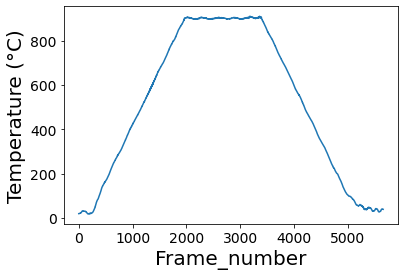

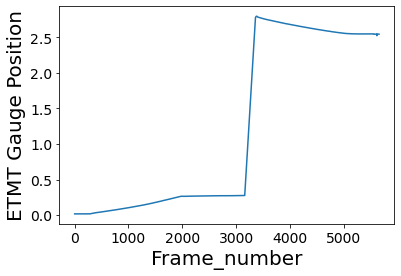

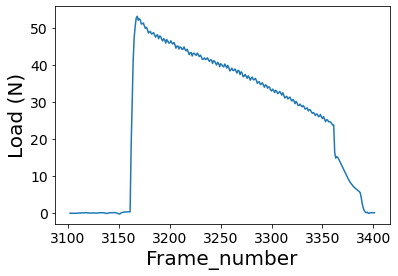

In [18]:
# define the file path to the instrument data 
#file_path_instrument_data = "../example_data/image_load_files_for_DAWN/adc_065_TI64_NDload_900C_15mms.dat"
file_path_instrument_data = "../../../SXRD_raw_data/diamond_2017/data_caked/image_load_files_for_DAWN/adc_065_TI64_NDload_900C_15mms.dat"

# set the range covering deformation
start_deform = 3101
end_deform = 3401

# the calculated max_frame will be used as the last step in a refinement
max_frame = analysis.plot_instrument_data(file_path_instrument_data, start_deform, end_deform)

# Save parameters to be used in the analysis

In [24]:
params = {"data_file": str(file_path),
          "first_cake_angle": first_cake_angle,
          "cakes_to_fit": cakes_to_fit, 
          "peak_params": peak_params,
          "frame_time": 0.1,
          "merge_cakes": False,
          "start_deform": start_deform,
          "end_deform": end_deform,
          "max_frame": max_frame
         }

data_folder = f"../yaml/{file_path.stem}_params.yaml"
with open(data_folder, "w") as output_file:
    yaml.dump(params, output_file)

In [47]:
param_list = pathlib.Path("../yaml/").glob("*.yaml")

In [51]:
params = yaml.load(input_file, Loader=yaml.Loader)

NameError: name 'input_file' is not defined

In [7]:
def get_config(path: str) -> dict:
    """Open a yaml file and return the contents."""
    with open(path) as input_file:
        return yaml.safe_load(input_file)

In [8]:
# to load the Diamond 2021 analysis
config_path = "../yaml/adc_065_TI64_NDload_900C_15mms_00001_params.yaml"
config = get_config(config_path)

In [22]:
peak_bounds = config["peak_params"]["peak1"]["peak_bounds"]
peak_label = config["peak_params"]["peak1"]["peak_label"]
local_bounds = config["peak_params"]["peak1"]["local_bounds"]
cakes_to_fit = config["cakes_to_fit"]

<class 'str'>


In [131]:
my_result = tuple(map(float, peak_bounds.split(', ')))

In [136]:
my_result

(3.22, 4.0)

In [134]:
peak_label = ['(0002)', '(110)', '(10-11)']
type(peak_label)

list